# Look at the data 

In [117]:
import csv
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

filename = 'train.csv' 
df = pd.read_csv(filename)
df.head()

,GameId,PlayId,Team,X,Y,S,A,Dis,Orientation,Dir,...,Week,Stadium,Location,StadiumType,Turf,GameWeather,Temperature,Humidity,WindSpeed,WindDirection
0,2017090700,20170907000118,away,73.91,34.84,1.69,1.13,0.40,81.99,177.18,...,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW
1,2017090700,20170907000118,away,74.67,32.64,0.42,1.35,0.01,27.61,198.70,...,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW
2,2017090700,20170907000118,away,74.00,33.20,1.22,0.59,0.31,3.01,202.73,...,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW
3,2017090700,20170907000118,away,71.46,27.70,0.42,0.54,0.02,359.77,105.64,...,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW
4,2017090700,20170907000118,away,69.32,35.42,1.82,2.43,0.16,12.63,164.31,...,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW


# Look at some Null Values 

In [113]:
field_positions = df['FieldPosition']
print(sum(field_positions.isnull()==True))
print(df.shape)

6424
(509762, 49)


In [114]:
print(sorted(df.YardLine.unique()))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]


In [115]:
df.dropna(subset=['FieldPosition'], inplace=True) # DON'T RUN THIS ERRYTIME, TEMPORARY
print(sum(df.FieldPosition.isnull()==True))
print(df.shape) # LOL all the null values are at the same yardline

0
(503338, 49)


In [116]:
print(sorted(df.YardLine.unique()))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]


In [118]:
# Think we'll want to handle this by filling in the null 'FieldPositions' with the value in 'PossessionTeam'
print(df[df.FieldPosition.isnull()][['GameId', 'PlayId', 'FieldPosition', 'PossessionTeam', 'YardLine']].head())
df.FieldPosition.fillna(df.PossessionTeam, inplace=True)
print(df[198:203][['GameId', 'PlayId', 'FieldPosition', 'PossessionTeam', 'YardLine']])

         GameId          PlayId FieldPosition PossessionTeam  YardLine
198  2017090700  20170907000801           NaN             KC        50
199  2017090700  20170907000801           NaN             KC        50
200  2017090700  20170907000801           NaN             KC        50
201  2017090700  20170907000801           NaN             KC        50
202  2017090700  20170907000801           NaN             KC        50
         GameId          PlayId FieldPosition PossessionTeam  YardLine
198  2017090700  20170907000801            KC             KC        50
199  2017090700  20170907000801            KC             KC        50
200  2017090700  20170907000801            KC             KC        50
201  2017090700  20170907000801            KC             KC        50
202  2017090700  20170907000801            KC             KC        50


In [119]:
field_positions = df['FieldPosition']
print(sum(field_positions.isnull()==True))
print(df.shape)

0
(509762, 49)


# UH OH

In [120]:
# Same gameid, same playid, same yards gained for the first 5 entries... hm..
print(df.head()[['GameId', 'PlayId', 'FieldPosition', 'PossessionTeam', 'YardLine', 'Yards']])
print(df.shape)

       GameId          PlayId FieldPosition PossessionTeam  YardLine  Yards
0  2017090700  20170907000118            NE             NE        35      8
1  2017090700  20170907000118            NE             NE        35      8
2  2017090700  20170907000118            NE             NE        35      8
3  2017090700  20170907000118            NE             NE        35      8
4  2017090700  20170907000118            NE             NE        35      8
(509762, 49)


In [121]:
df.drop_duplicates(subset = 'PlayId', keep = 'first', inplace = True)
print(df.head()[['GameId', 'PlayId', 'FieldPosition', 'PossessionTeam', 'YardLine', 'Yards']])
df.reset_index(drop=True, inplace=True)
print(df.head()[['GameId', 'PlayId', 'FieldPosition', 'PossessionTeam', 'YardLine', 'Yards']])
print(df.shape)

        GameId          PlayId FieldPosition PossessionTeam  YardLine  Yards
0   2017090700  20170907000118            NE             NE        35      8
22  2017090700  20170907000139            NE             NE        43      3
44  2017090700  20170907000189            KC             NE        35      5
66  2017090700  20170907000345            KC             NE         2      2
88  2017090700  20170907000395            KC             KC        25      7
       GameId          PlayId FieldPosition PossessionTeam  YardLine  Yards
0  2017090700  20170907000118            NE             NE        35      8
1  2017090700  20170907000139            NE             NE        43      3
2  2017090700  20170907000189            KC             NE        35      5
3  2017090700  20170907000345            KC             NE         2      2
4  2017090700  20170907000395            KC             KC        25      7
(23171, 49)


# PreProcess the Data

## Calculate number of yards remaining 

In [122]:
yard_lines = df['YardLine']
field_positions = df['FieldPosition']
possession_teams = df['PossessionTeam'] 

yard_lines_adjusted = 100 - yard_lines[field_positions!=possession_teams]
yards_remaining = yard_lines[field_positions==possession_teams].append(yard_lines_adjusted)

# Perform Naive Bayes 

## Calculate probability of x yards gained given y yards remaining

In [124]:
yards = df['Yards']

yard_counts = np.zeros((99,199), dtype = 'uint32')
yard_probabilities = np.zeros((99,199), dtype = 'float')

for yard_remaining in range(1,100):
    yards_current = yards[yards_remaining==yard_remaining]
    
    for yard in range(-99, 100):
        yard_counts[yard_remaining-1,yard+99] = sum(yards_current==yard)
        
    yard_probabilities[yard_remaining-1,:] = yard_counts[yard_remaining-1,:] / np.sum(yard_counts[yard_remaining-1,:])

## Plot Probabilities 

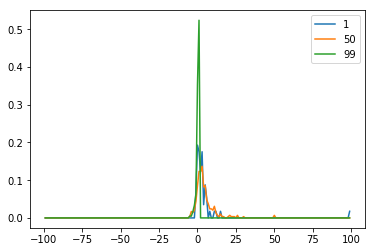

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.00803213
 0.00401606 0.01204819 0.02409639 0.04417671 0.04819277 0.09638554
 0.11646586 0.08032129 0.13253012 0.08835341 0.06425703 0.06827309
 0.0562249  0.04016064 0.02811245 0.00803213 0.01204819 0.01204819
 0.01204819 0.00803213 0.00803213 0.         0.         0.
 0.         0.00401606 0.00401606 0.         0.00401606 0.00401606
 0.         0.00401606 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.00401606 0.         0.
 0.         0.         0.         0.         0.         0.
 0.00401606]


In [125]:
for yard_line in [1,50,99]:
    yard_line_index = yard_line -1
    plt.plot(np.arange(-99,100),yard_probabilities[yard_line_index,:], label = str(yard_line))
    
plt.legend()    
plt.show() 

# Observations: seems like there is some data missing...
# at the 50 yard line, many yards gained in the 0-50 window have 0 probability, 
# even those should have almost certainly happened some! 
# uncomment the line below for an example 
# Is Laplace smoothing the solution? Or something more significant? 
print(yard_probabilities[50, 52:149]) # look at all possible yards gained at the 50 yard line 